### Exploratory data analysis

- Preparing data
    - Import
    - Explore: Class Imbalance, Positive class and Negative clas; skew
    - Split
    - Resample: Undersampling and oversampling
- Build Model
    - Baseline
    - Iterate
    - Evaluate: Confusion Matrix
- Communicate Results
    - Feature importances
    - Save model as a file: Binary mode

In [359]:
import pandas as pd
import gzip
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import wqet_grader
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#### Data Wrangling

In [360]:
def wrangle(filename):
    # Open compressed file, load into dictionary
    with gzip .open(filename) as f:
        data = json.load(f)
    # Load dictionaary into a Dataframe
    df = pd.DataFrame().from_dict(data["data"]).set_index("company_id")
    return df

In [361]:
df=wrangle("./data/poland-bankruptcy-data-2009.json.gz")

#### Exploratory Data Analysis

    - Check for missing data
    - Check for datatype

In [362]:
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.29510,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.17571,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.04061,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.23493,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.549,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,0.207660,0.341880,0.271630,0.182060,412.30,0.88528,1.7981,0.182060,0.100450,43.168,1.27240,0.00000,0.100450,NaN,0.41600,0.88528,0.00000,2.21180,3.8104,0.299260,0.228770,241.410,1.5120,1.44780,0.029538,1.8126,49.017,0.45691,0.016296,0.185600,0.059746,0.000000,152.160,108.990,0.849300,1.20190,97.177,-0.310280,-0.171190,1.5364,0.53254,0.66140,3.0496,3.1393,2080.6,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [363]:
# Inspect the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   float64


In [364]:
df["bankrupt"].value_counts()

bankrupt
False    9510
True      467
Name: count, dtype: int64

<Axes: xlabel='Bankrupt', ylabel='Frequency'>

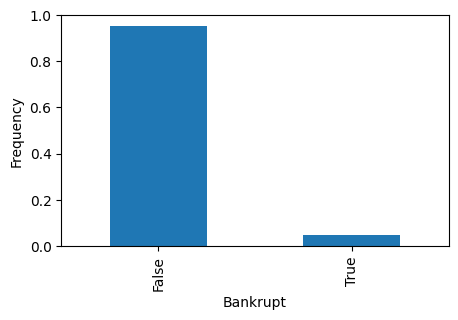

In [365]:
# Check class imbalance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    figsize=(5,3),
    xlabel="Bankrupt",
    ylabel="Frequency"
)


    Positive and Negative Classes
    

How do we define the positive and negative class?

    - We ask ourselves a question, what do we want to find out with this data?
    - In this case, the question is, "Will this company go bankrupt?"
    - Or in our Trading case, "Will the price go up?"

    The class that is associated with a Yes, is our positive class. And No is our negative class.
    
    - In our case, our positive class is going backrupt? Yes and True and Positive class.
    - It has nothing to do with the majority or minority class.

<p style="color: yellow; font-size:20px">Check one of the Feature</p>
    
    - Feature 27 - Profit/Expenses

Text(0.5, 1.0, 'Distribution of Profit/Expenses Ratio , by Class')

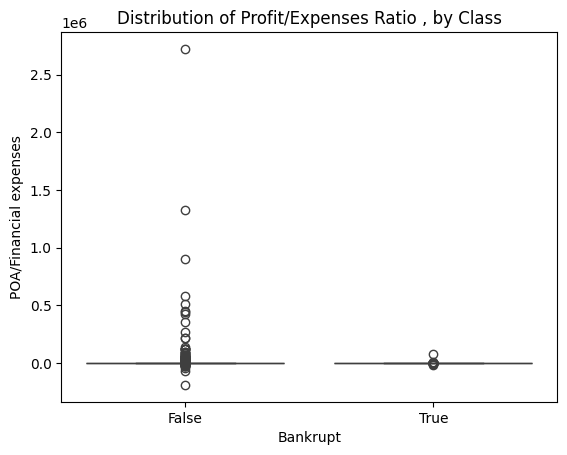

In [366]:
sns.boxplot(x="bankrupt",y="feat_27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA/Financial expenses")
plt.title("Distribution of Profit/Expenses Ratio , by Class")

In [367]:
df["feat_27"].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

Text(0.5, 1.0, 'Distribution of Profit/Expenses Ratio')

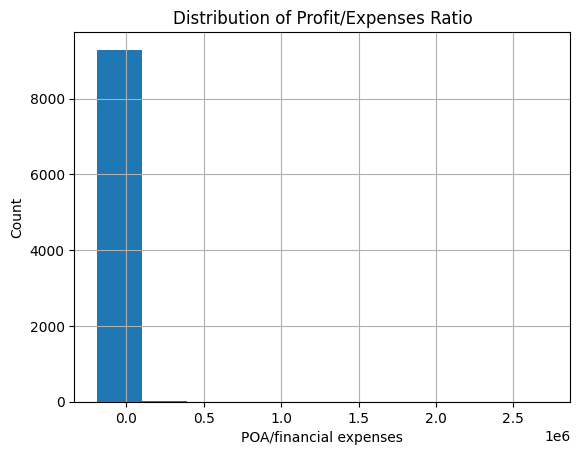

In [368]:
df["feat_27"].hist()
plt.xlabel("POA/financial expenses")
plt.ylabel("Count")
plt.title("Distribution of Profit/Expenses Ratio")

    Clipping the outliers

Text(0.5, 1.0, 'Distribution of Profit/Expenses Ratio , by Class')

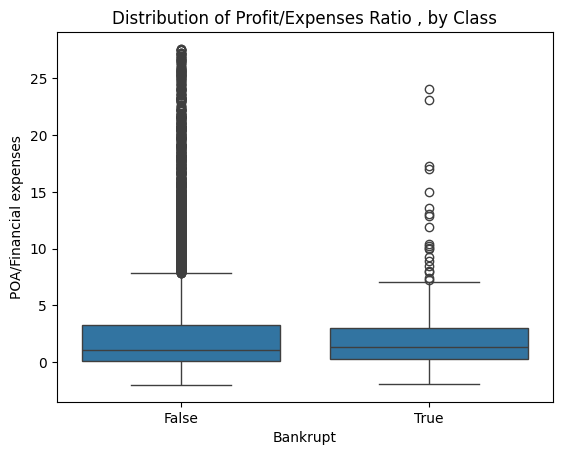

In [369]:
q1, q9=df["feat_27"].quantile([0.1,0.9])
mask = df["feat_27"].between(q1,q9)
sns.boxplot(x="bankrupt",y="feat_27", data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA/Financial expenses")
plt.title("Distribution of Profit/Expenses Ratio , by Class")

    - Correlation Heatmap

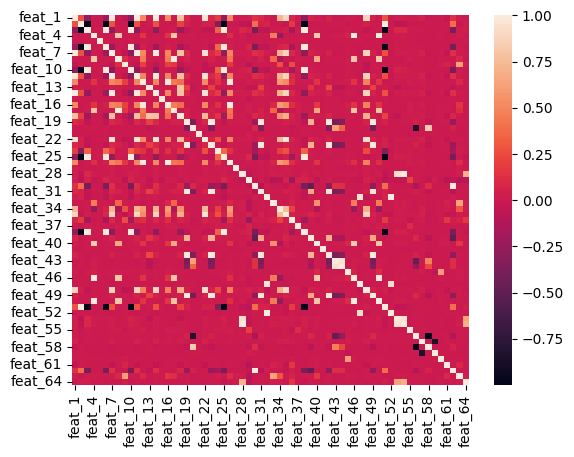

In [370]:
corr = df.drop(columns=["bankrupt"]).corr()
sns.heatmap(corr);

In [371]:
target_column = "bankrupt"
test_size = 0.2
X = df.drop(columns=target_column)
y = df[target_column].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)

In [372]:
y.value_counts()

bankrupt
0    9510
1     467
Name: count, dtype: int64

    Undersampling

In [373]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)

In [374]:
y_train_under.value_counts(normalize=True)

bankrupt
0    0.5
1    0.5
Name: proportion, dtype: float64

    Oversampling

In [375]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over,y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)


(15190, 64)


In [376]:
y_train_over.value_counts(normalize=True)

bankrupt
0    0.5
1    0.5
Name: proportion, dtype: float64

#### Building the Model

In [377]:
acc_baseline= y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:",  round(acc_baseline,4))

Baseline Accuracy: 0.9516


In [378]:
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train,y_train)

#Fit on X_Train_under
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)

model_under.fit(X_train_under,y_train_under)

#Fit on X_Train_over
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)

model_over.fit(X_train_over,y_train_over)

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


##### Model Evaluation

    Accuracy Scores

In [379]:
for m in [model_reg,model_under,model_over]:
    acc_train=m.score(X_train,y_train)
    acc_test=m.score(X_test,y_test)
    print("Training Accuracy:",round(acc_train,4))
    print("Test Accuracy:",round(acc_test,4))

Training Accuracy: 1.0
Test Accuracy: 0.9364
Training Accuracy: 0.7281
Test Accuracy: 0.7029
Training Accuracy: 1.0
Test Accuracy: 0.9414


    Confusion Matirx

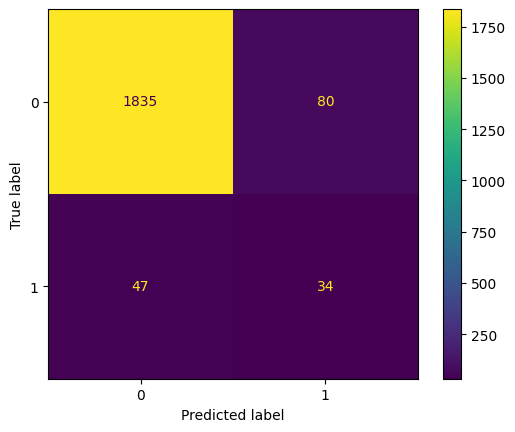

In [380]:
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

    Calculate tree depth

In [381]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

29


#### Communication

    For Non-Technical Deliverable

Text(0.5, 1.0, 'model_over Feature Importance')

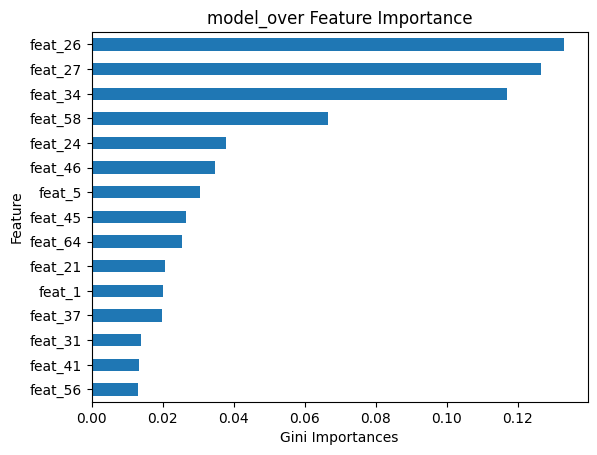

In [382]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

#Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot Series

feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importances")
plt.ylabel("Feature")
plt.title("model_over Feature Importance")


In [383]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

#Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot Series

# feat_imp.plot(kind="barh", figsize=(15,15))

    Save model in a file

In [384]:
# Save your model as 'model-5-2.pkl'

with open("model-5-2.pkl","wb") as f:
    pickle.dump(model_over,f)

    Load and use the model

In [385]:
with open("model-5-2.pkl","rb") as f:
    loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


    Submit Assignment

In [ ]:
# with open("model-5-2.pkl","rb") as f:
#     loaded_model = pickle.load(f)
#     wqet_grader.grade(
#         "Project 5 Assesment",
#         "Task 5.2.16",
#         loaded_model
#     )

Exception: Could not encode this submission for remote grading: [Errno 13] Permission denied: 'C:\\Users\\luvra\\AppData\\Local\\Temp\\tmp0_dezuec'